In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from game import game

In [2]:
# Run the game 10000 times and store the results
cycles = []
for i in range(10000):
    cycles.append(game())

results = pd.DataFrame(cycles, columns=["cycles", "winner"])
results.to_csv("results.csv", index=False)
results.head(5)

,cycles,winner
0,13,A
1,30,A
2,6,A
3,31,B
4,10,A


In [3]:
# aggregate counts of cycles
results_grouped = results.groupby("cycles", as_index=False).count()
results_grouped.columns = ["cycles", "count"]
results_grouped.head(5)

,cycles,count
0,5,609
1,6,673
2,7,637
3,8,583
4,9,532


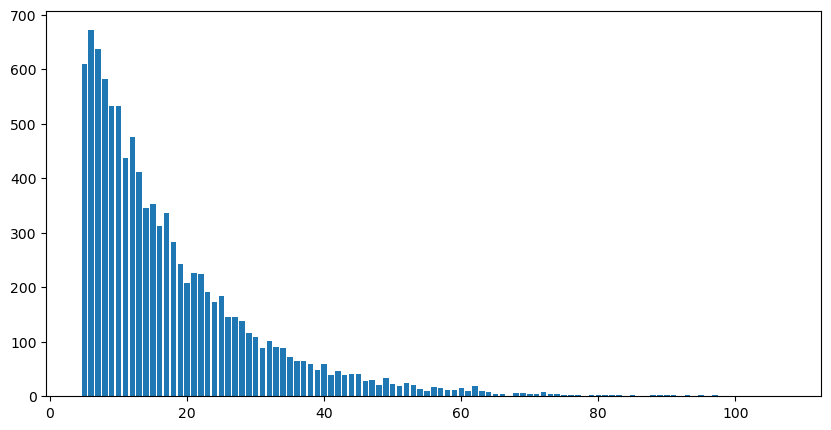

In [4]:

# Plot the number of cycles in the results as a histogram. Make the histogram wider by setting the figsize parameter.
fig, axes = plt.subplots(figsize=(10, 5))
axes.bar(results_grouped["cycles"], height=results_grouped["count"])
plt.show()

In [5]:
# compute the expected number of cycles
expected_cycles = results["cycles"].mean()
print("Expected number of cycles: ", expected_cycles)

Expected number of cycles:  17.7906


In [6]:
# Compute the distribution of the number of cycles
# find the missing values

## Getting the distribution that fits the model

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.001241,1602.990593,-158997.094994,inf,0.060900,1.104528e-32
gamma,0.001498,1301.213332,-157112.826122,inf,0.137662,9.116368e-166
expon,0.002870,1311.202740,-150618.602445,inf,0.060900,1.104528e-32
powerlaw,0.007154,1084.087962,-141476.348984,inf,0.314025,0.000000e+00
cauchy,0.014775,1296.121360,-134232.999265,inf,0.202765,0.000000e+00


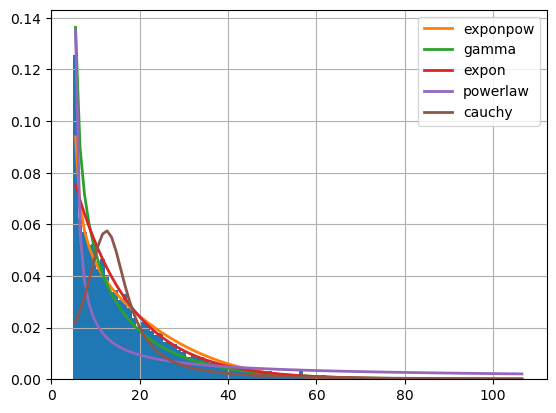

In [31]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(results["cycles"].values,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [32]:
f.fitted_param

{'expon': (5.0, 12.790600000000001),
 'norm': (17.7906, 13.000813499162273),
 'uniform': (5.0, 102.0),
 'rayleigh': (-1.7700413994896929, 16.607827124573372),
 'cauchy': (12.47497915750337, 5.53072489352636),
 'powerlaw': (0.21211554380967973, 4.999999999999999, 102.00000000000001),
 'lognorm': (1.714665466676502, 4.93603093254467, 2.45293350245052),
 'gamma': (0.6761939629174252, 4.999999999999999, 16.33848128299691),
 'chi2': (1.1650801490650524, 4.999999999999999, 4.160171755816718),
 'exponpow': (0.708081047498045, 4.999999999999999, 22.819605842156243)}